# Mathematical optimization with Python
ECON 3127/4414/8014 Computational methods in economics  
Week 5 
Fedor Iskhakov  
<img src="../img/lecture.png" width="64px"/>

&#128214; Kevin Sheppard "Introduction to Python for Econometrics, Statistics and Data Analysis."
    *Chapter: 21*

## Plan for the lecture
1. Newton-Raphson method
2. Quasi-Newton methods
3. Derivative free optimization
4. Constrained optimization

In [1174]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plotme(fun,a=0,b=1,label='',show=False,legend=False,color='red'):
    '''Plots function fun on interval [a,b], or a dot if fun=[x,y]'''
    figure(num=1, figsize=(10,8))
    if callable(fun):
        # function
        x = np.linspace(a,b,1000)
        y = [fun(x) for x in x]
        plt.plot(x,y,label=label,c=color)
        plt.xlim((a,b))
        plt.grid(True)
    elif isinstance(fun,list) and len(fun) in (3,4): # line
        if len(fun) == 3: # fun=[x ymin ymax]
            x, y = [fun[0],fun[0]], fun[1:] # vertical
        else: # fun=[x1 y1 x2 y2]
            x, y = fun[::2], fun[1::2]
        plt.plot(x,y,label=label,c=color)
    elif isinstance(fun,list) and len(fun)==2: # one dot
        x, y = fun
        plt.scatter(x,y,label=label,c=color)
    if legend:
        plt.legend()
    if show:
        plt.show()

### Example

$$
\max_{x \in \mathbb{R}} f(x) = -x^4 + 2.5x^2 + x + 2
$$

First order condition:

$$
\begin{eqnarray}
f'(x)=-4x^3 + 5x +1 &=& 0 \\
-4x(x^2-1) + x+1 &=& 0 \\
(x+1)(-4x^2+4x+1) &=& 0 \\
\big(x+1\big)\big(x-\frac{1}{2}-\frac{1}{\sqrt{2}}\big)\big(x-\frac{1}{2}+\frac{1}{\sqrt{2}}\big) &=& 0
\end{eqnarray}
$$

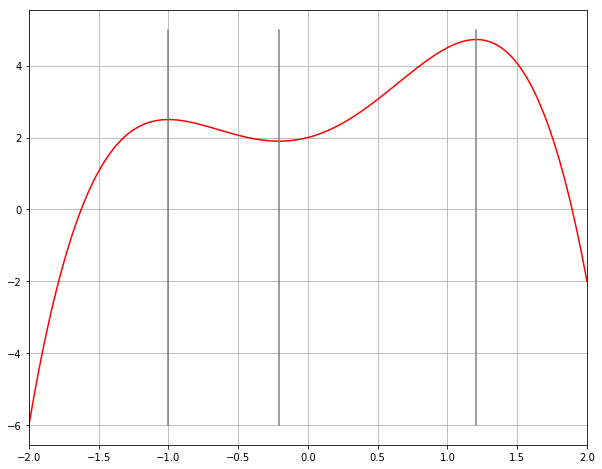

In [1175]:
f = lambda x: -x**4+2.5*x**2+x+2
plotme(f,-2,2)
plotme([-1.0,-6,5],color='grey')
plotme([0.5 - 1/np.sqrt(2),-6,5],color='grey')
plotme([0.5 + 1/np.sqrt(2),-6,5],color='grey')

Second order conditions:

$$
\begin{eqnarray}
f''(x) = -12x^2 + 5 && \\
& f''(-1) = -7 < 0 \Rightarrow & \text{ maximum} \\
& f''\big(\frac{1}{2}-\frac{1}{\sqrt{2}}\big) = 4.4853 > 0 \Rightarrow & \text{ minimum} \\
& f''\big(\frac{1}{2}+\frac{1}{\sqrt{2}}\big) = -12.4853 < 0 \Rightarrow & \text{ maximum} \\
\end{eqnarray}
$$

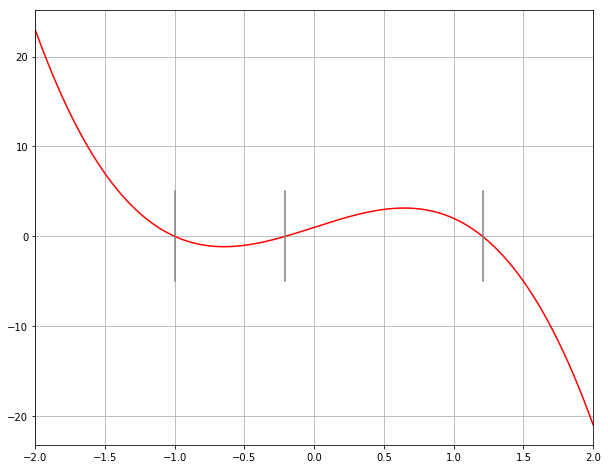

In [1176]:
g = lambda x: -4*x**3+5*x+1
plotme(g,-2,2)
plotme([-1.0,-5,5],color='grey')
plotme([0.5 - 1/np.sqrt(2),-5,5],color='grey')
plotme([0.5 + 1/np.sqrt(2),-5,5],color='grey')

### Newton (Newton-Raphson) method = solving F.O.C

More often than not, this is all that is done to find an optimum (maximum or minimum) of a function in practice. Sufficient conditions more often than not should follow from higher order properties of the problem, and are taken for granted in mere computation.

Derivation for Newton method using Taylor series expansion

$$
g(x) = \sum_{k=0}^{\infty} \frac{g^{(k)}(x_0)}{k!} (x-x_0)^k
$$

Take first two terms, assume $g(x)$ is solution, and let $x_0=x_i$ and $x=x_{i+1}$ 

$$
0 = g(x) = g(x_i) + g'(x_i) (x_{i+1}-x_i) \quad \Rightarrow \quad x_{i+1} = x_i - \frac{g(x_i)}{g'(x_i)}
$$

Remember $g(x)=f'(x)$, so Newton iteration is 
$x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)}$

In [1177]:
def show_newton(fun,grad,x0,a=0,b=1,steps=10):
    '''Illustration for the Newton method'''
    ylim=[fun(a),min(fun(b),0)]
    x=x0
    plotme([a,0,b,0],color='grey')
    plt.title('Step 0')
    plotme(fun,a=a,b=b,color='red')
    plotme([x,0],a=a,b=b,color='red',show=True)
    for i in range(1,steps):
        plotme([a,0,b,0],color='grey')
        plt.title('Step %d' % i)
        plotme(fun,a=a,b=b,color='red')
        plotme([x,0],a=a,b=b,color='green')
        plotme([x,0,fun(x)],a=a,b=b,color='green')
        # Newton step
        g = grad(x)
        x = x - fun(x)/grad(x)
        l = lambda z: g*(z - x)
        plotme(l,a=a,b=b,color='blue')
        plotme([x,0],a=a,b=b,color='red',show=True)

In [1178]:
def show_bisection(fun,a=0,b=1,tol=1e-6):
    '''Illustration for the bisection method'''
    ylim=[fun(a),min(fun(b),0)]
    plotme([a,0,b,0],color='grey')
    plotme(fun,a=a,b=b,color='red')
    if fun(a)*fun(b)>0:
        raise(ValueErro('Bad limits'))
    while np.abs(b-a)>tol:
        x = (a+b)/2
        plotme([x,ylim[0],x,ylim[1]],a=a,b=b,color='green')
        if fun(a)*fun(x)>0:
            a = x
        else:
            b = x
    return (a+b)/2

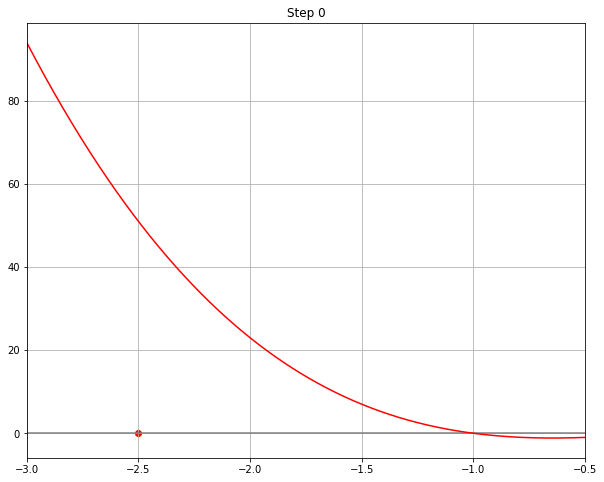

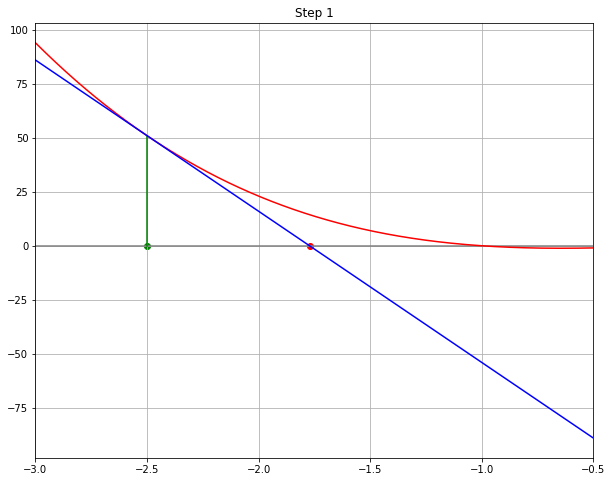

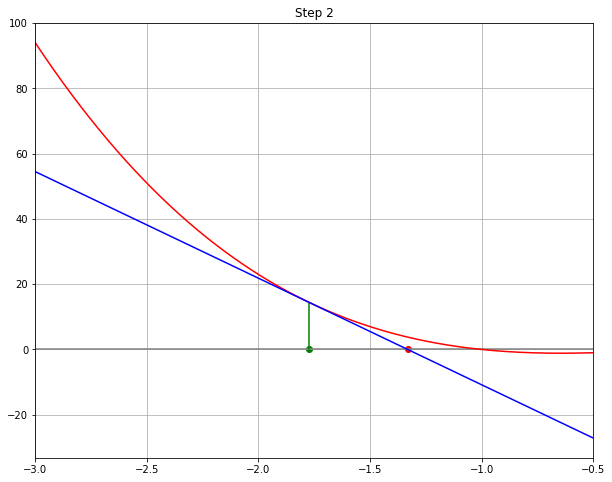

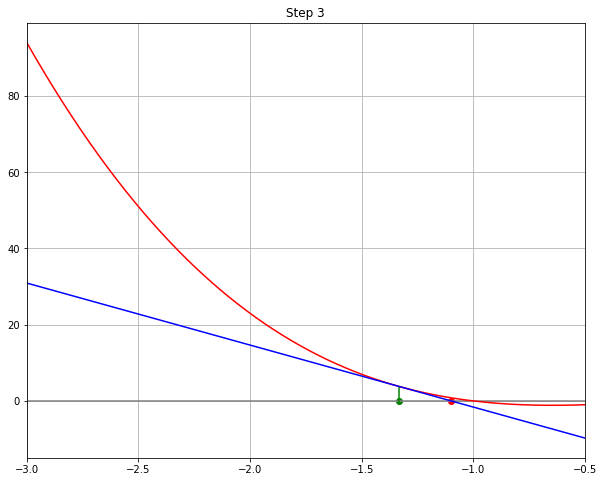

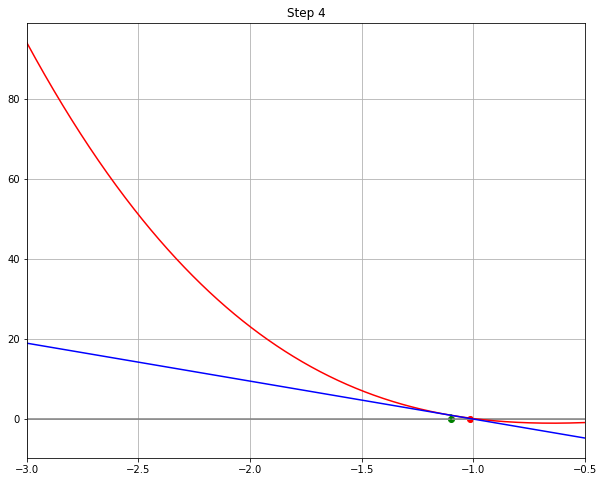

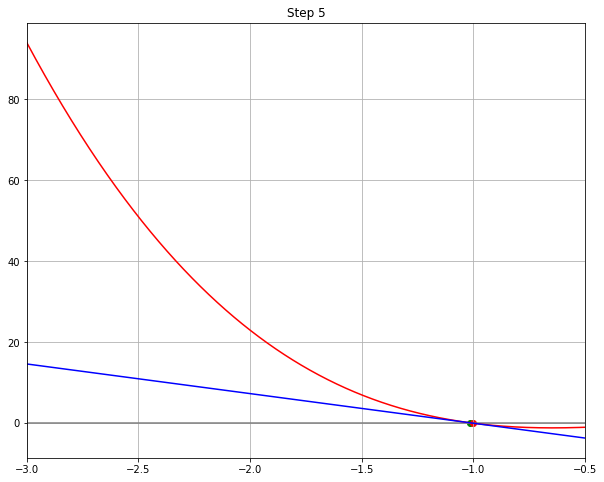

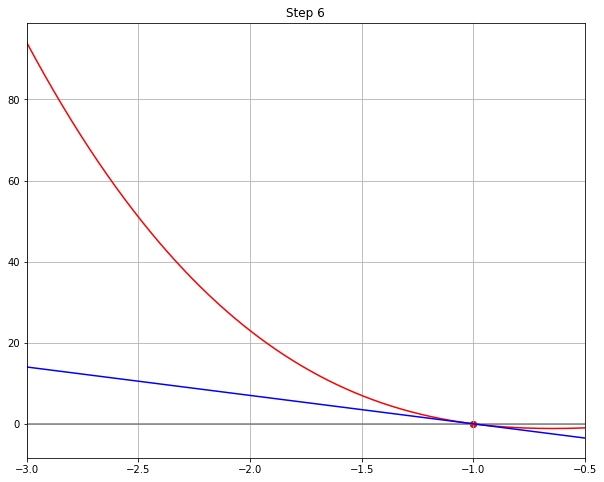

In [1179]:
g = lambda x: -4*x**3+5*x+1
h = lambda x: -12*x**2+5
show_newton(g,h,-2.5,a=-3,b=-0.5,steps=7)

-0.9999998211860657

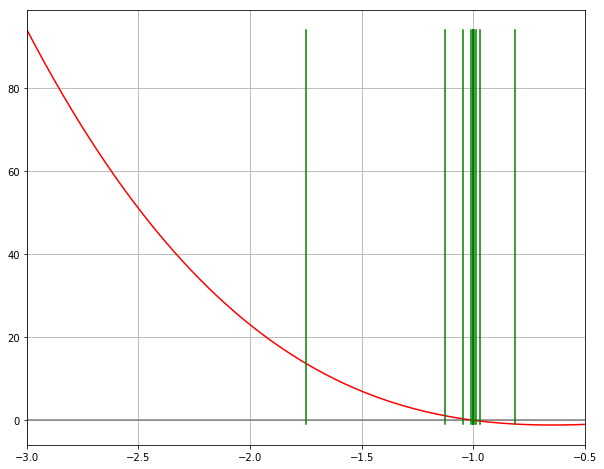

In [1180]:
g = lambda x: -4*x**3+5*x+1
# h = lambda x: -12*x**2+5
show_bisection(g,a=-3,b=-0.5)

In [1181]:
### Convergence rate: quadratic (!)

In [1182]:
def newton_rate(fun,grad,x0,tol=1e-12,maxiter=100):
    '''Illustration for the Newton method convergence rate'''
    x=x0
    for i in range(maxiter):
        x1 = x - fun(x)/grad(x)
        print('%3d %12.8f %1.3e' % (i,x,x1-x))
        if np.abs(x1-x)<tol:
            return x1
        x = x1
    else:
        print('Failed to converge!')
        return None
        
def bisection_rate(fun,a=0,b=1,tol=1e-12,maxiter=100):
    '''Illustration for the bisection method rate'''
    if fun(a)*fun(b)>0:
        raise(ValueErro('Bad limits'))
    for i in range(maxiter):
        x = (a+b)/2
        print('%3d %12.8f %1.3e' % (i,x,np.abs(b-a)))
        if np.abs(b-a)<tol:
            return x
        if fun(a)*fun(x)>0:
            a = x
        else:
            b = x
    else:
        print('Failed to converge!')
        return None

In [1183]:
g = lambda x: -4*x**3+5*x+1
h = lambda x: -12*x**2+5
x=newton_rate(g,h,-2.5)
print('Newton solution ', x)

  0  -2.50000000 7.286e-01
  1  -1.77142857 4.403e-01
  2  -1.33114945 2.324e-01
  3  -1.09877514 8.562e-02
  4  -1.01315263 1.287e-02
  5  -1.00028617 2.860e-04
  6  -1.00000014 1.403e-07
  7  -1.00000000 3.375e-14
Newton solution  -1.0


In [1184]:
x=bisection_rate(g,a=-3,b=-0.5)
print('Bisection solution ', x)

  0  -1.75000000 2.500e+00
  1  -1.12500000 1.250e+00
  2  -0.81250000 6.250e-01
  3  -0.96875000 3.125e-01
  4  -1.04687500 1.562e-01
  5  -1.00781250 7.812e-02
  6  -0.98828125 3.906e-02
  7  -0.99804688 1.953e-02
  8  -1.00292969 9.766e-03
  9  -1.00048828 4.883e-03
 10  -0.99926758 2.441e-03
 11  -0.99987793 1.221e-03
 12  -1.00018311 6.104e-04
 13  -1.00003052 3.052e-04
 14  -0.99995422 1.526e-04
 15  -0.99999237 7.629e-05
 16  -1.00001144 3.815e-05
 17  -1.00000191 1.907e-05
 18  -0.99999714 9.537e-06
 19  -0.99999952 4.768e-06
 20  -1.00000072 2.384e-06
 21  -1.00000012 1.192e-06
 22  -0.99999982 5.960e-07
 23  -0.99999997 2.980e-07
 24  -1.00000004 1.490e-07
 25  -1.00000001 7.451e-08
 26  -0.99999999 3.725e-08
 27  -1.00000000 1.863e-08
 28  -1.00000000 9.313e-09
 29  -1.00000000 4.657e-09
 30  -1.00000000 2.328e-09
 31  -1.00000000 1.164e-09
 32  -1.00000000 5.821e-10
 33  -1.00000000 2.910e-10
 34  -1.00000000 1.455e-10
 35  -1.00000000 7.276e-11
 36  -1.00000000 3.638e-11
 

### What are potential problems with Newton?

- Divergence
- Cycles
- Domain
- Differentiability

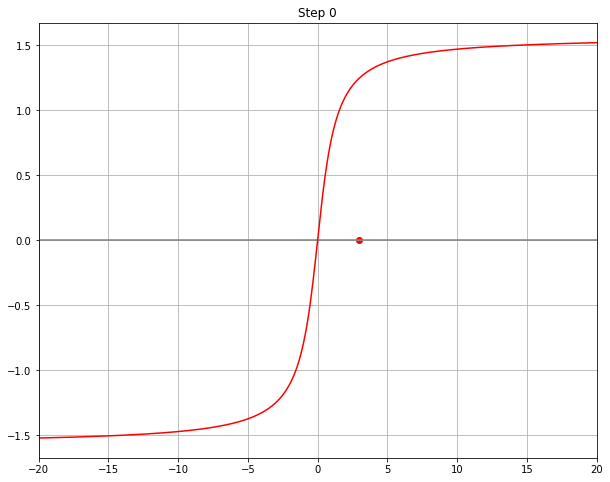

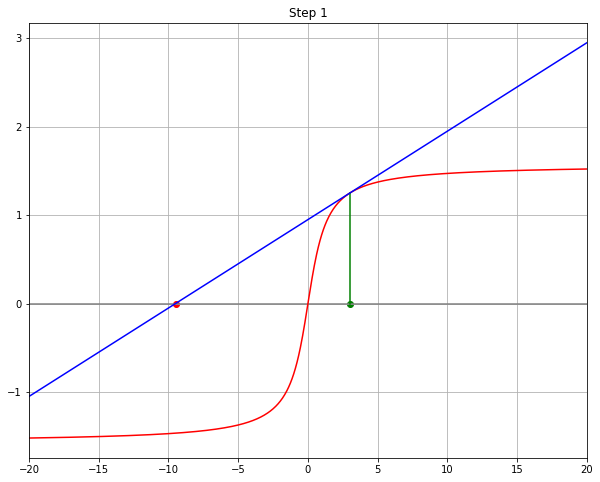

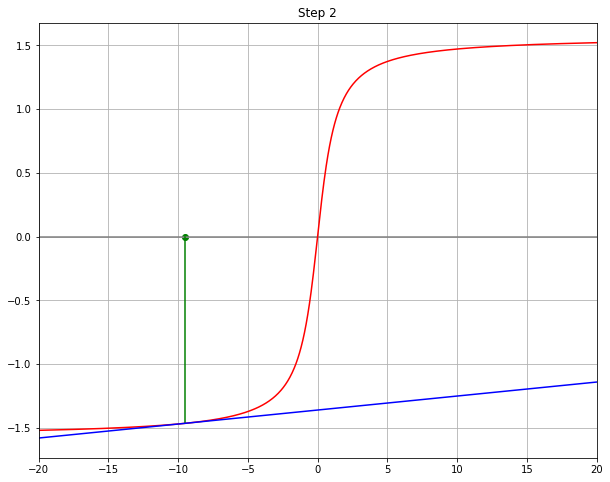

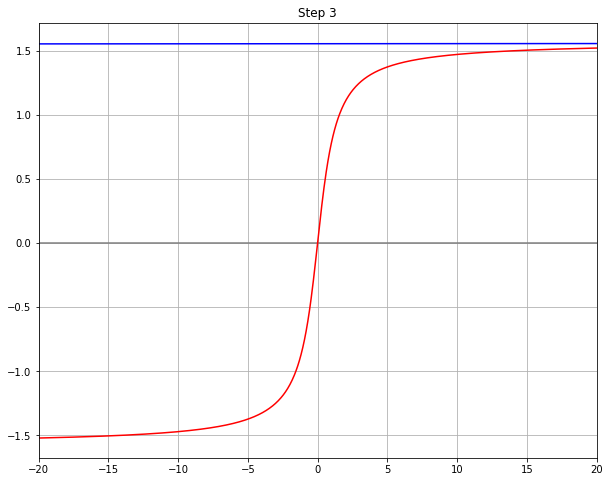

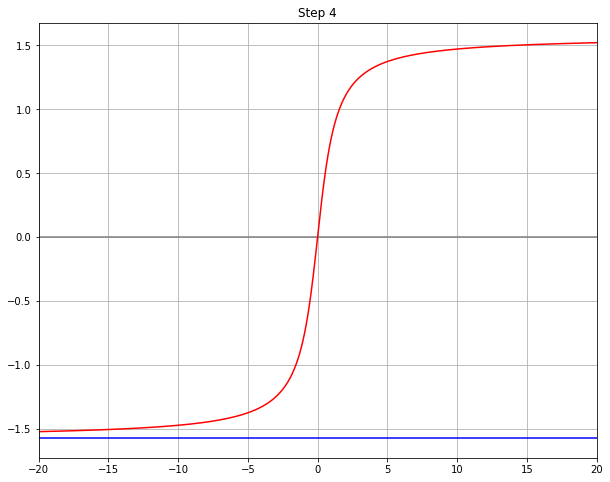

In [1185]:
g = lambda x: np.arctan(x)
h = lambda x: 1/(1+x**2)
x0 = 3.0
show_newton(g,h,x0,a=-20,b=20,steps=5)

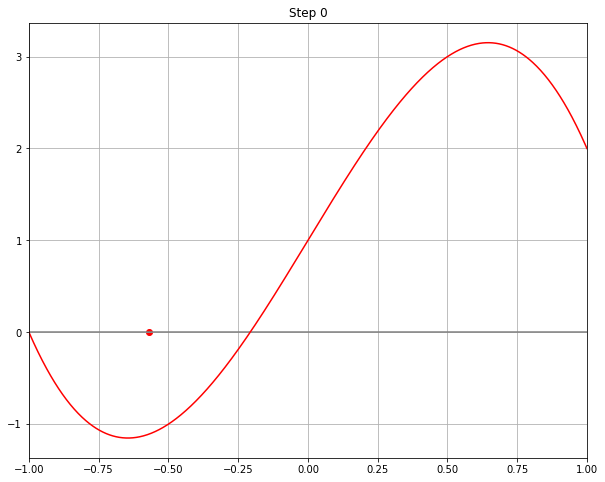

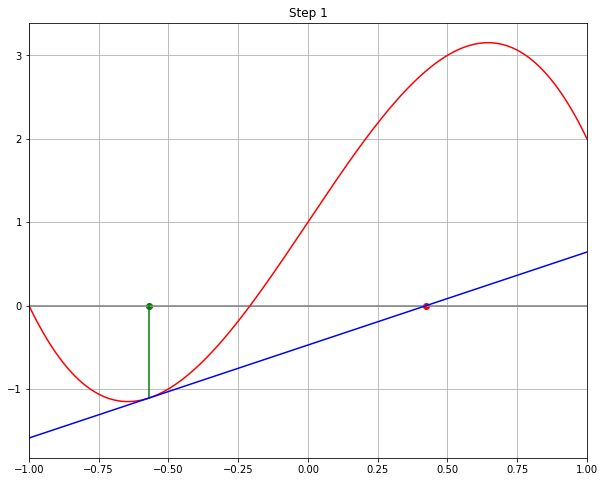

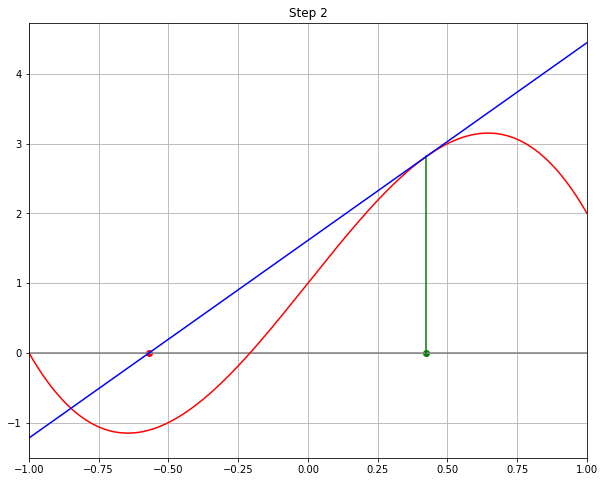

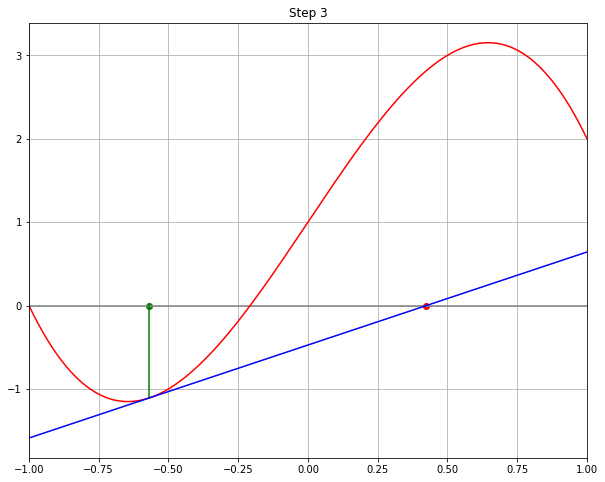

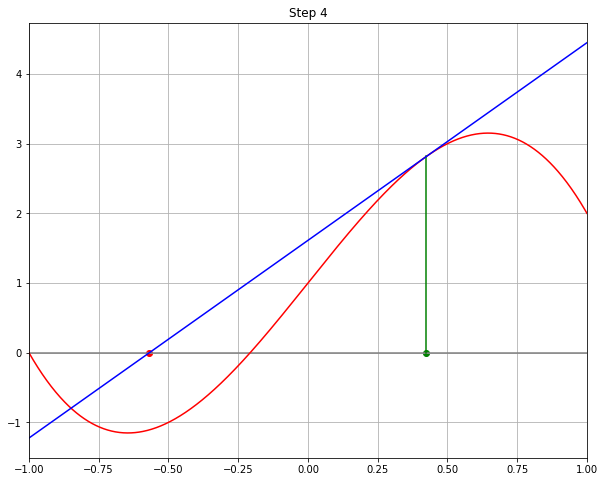

In [1186]:
# Run example 3: cycle
g = lambda x: -4*x**3+5*x+1
h = lambda x: -12*x**2+5
x0 = -0.568983917236328
show_newton(g,h,x0,a=-1,b=1,steps=5)

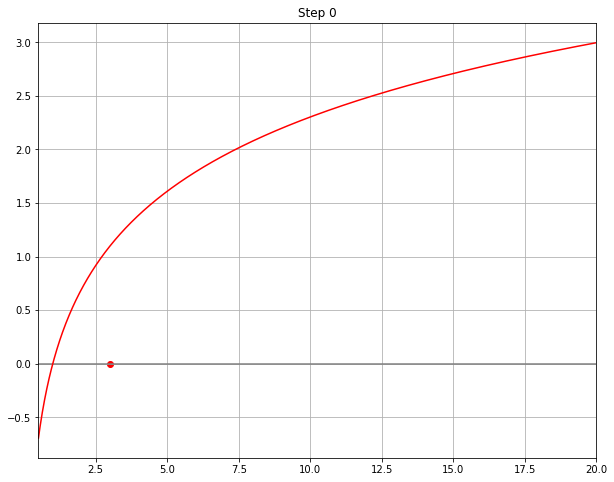

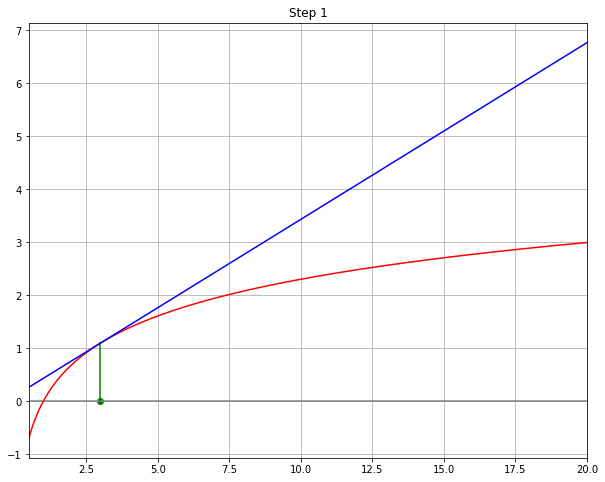

/Users/fedor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


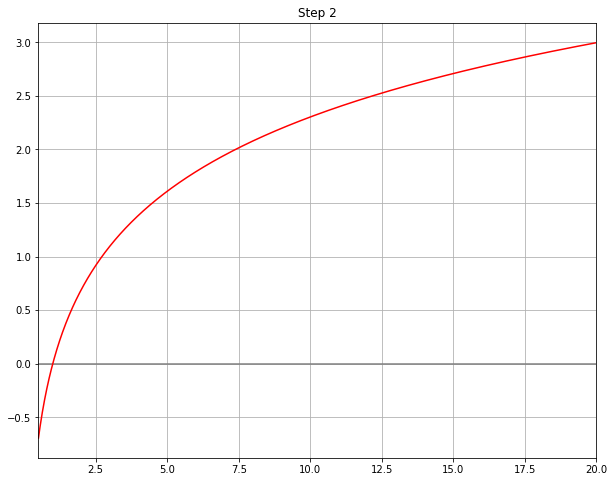

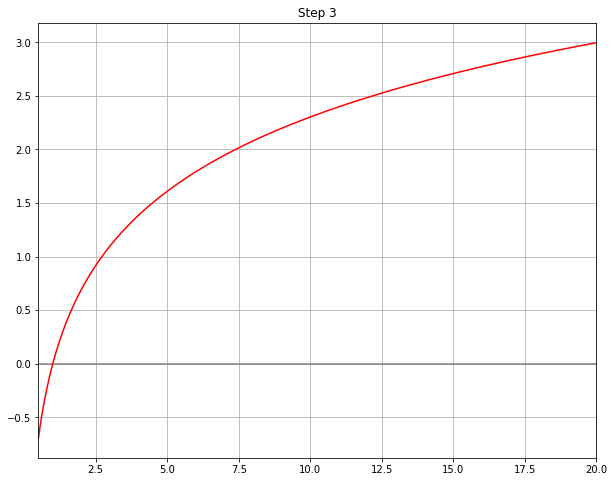

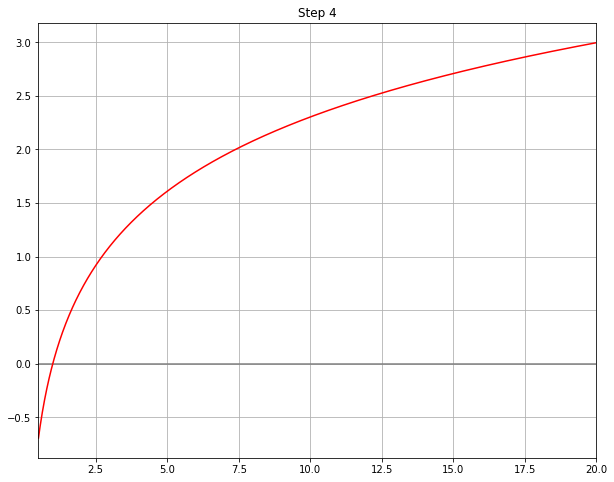

In [1187]:
g = lambda x: np.log(x)
h = lambda x: 1/x
x0 = 3.0
show_newton(g,h,x0,a=.5,b=20,steps=5)


### Multi-dimensional case = solving system of equations

$$
G(x) = 0,
$$
where $x \ in \mathbb{R}^n$ and $G(x)$ is $n$-valued function.

**Jacobian matrix** is $n$-by-$n$ matrix of partial derivatives $\nabla G(x)$

Newton step

$$
x_{i+1} = x_{i} - \big( \nabla G(x_i) \big)^{-1} G(x_i)
$$

### Multi-dimensional case = optimization of multi-variate function

Consider $F(x) \rightarrow \max$, let $G(x)$ be the **gradient** of $F(x)$, which is an $n$-valued function. 
Then F.O.C. are

$$
G(x) = \nabla F(x) = 0
$$

$$
x_{i+1} = x_{i} - \big( \nabla^2 F(x_i) \big)^{-1} \nabla 
F(x_i)
$$

$\nabla^2 F(x)$ is $n$-by-$n$ matrix of second derivatives is **Hessian matrix**

### Example
$$
F(x,y) = 2.575 - 2 \cos(x) \cos(y+\pi) - 0.575 \cos(1.25 \pi - 2x) 
$$

In [1188]:
F = lambda x, y: 2.575 - 2*np.cos(x)*np.cos(y+np.pi) - 0.575*np.cos(1.25*np.pi - 2*x) 
bound=2*np.pi
# bound=3*np.pi
xx = np.linspace(0, bound, 100)
yy = np.linspace(0, bound, 100)
X,Y = np.meshgrid(xx, yy)
Zf = F(X, Y)
def contour_plot(X,Y,Z,levels=20):
    fig, ax = plt.subplots(figsize=(10,8))
    cnt = plt.contour(X,Y,Z, vmin=Z.min(), vmax=Z.max(),levels=np.linspace(Z.min(),Z.max(),levels))

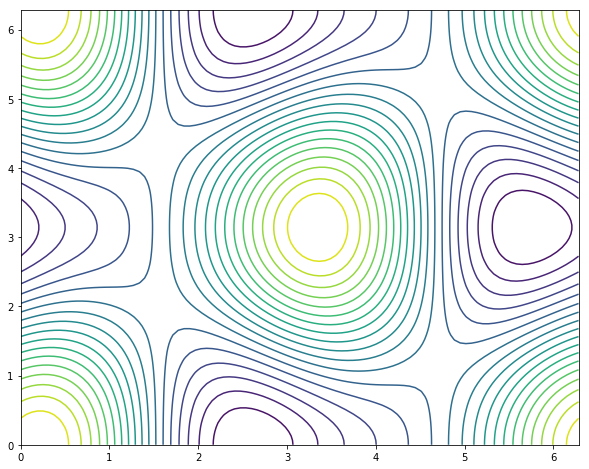

In [1189]:
contour_plot(X,Y,Zf)

### Example
$$
F(x,y) = 2.575 - 2 \cos(x) \cos(y+\pi) - 0.575 \cos(1.25 \pi - 2x) 
$$
$$
G(x,y) = 
\begin{pmatrix} 
2 \sin(x) \cos(y+\pi) - 1.15 \sin(1.25\pi - 2x) \\
2 \cos(x) \sin(y+\pi) \\
\end{pmatrix}
$$
$$
H(x,y) = 
\begin{pmatrix} 
2 \cos(x) \cos(y+\pi) + 2.3 \cos(1.25\pi - 2x) & -2 \sin(x) \sin(y+\pi) \\
-2 \sin(x) \sin(y+\pi) & 2 \cos(x) \cos(y+\pi) \\
\end{pmatrix}
$$

In [1190]:
G = lambda x, y: np.array([[2*np.sin(x)*np.cos(y+np.pi) - 2*0.575 * np.sin(1.25*np.pi - 2*x)],
                          [2*np.cos(x)*np.sin(y+np.pi)]] )
H = lambda x, y: np.array([[2*np.cos(x)*np.cos(y+np.pi) - 2*0.575 * np.sin(1.25*np.pi - 2*x),
                            -2*np.sin(x)*np.sin(y+np.pi)],
                           [-2*np.sin(x)*np.sin(y+np.pi),
                            2*np.cos(x)*np.cos(y+np.pi)]])
Zg=G(X,Y)
Zh=H(X,Y)

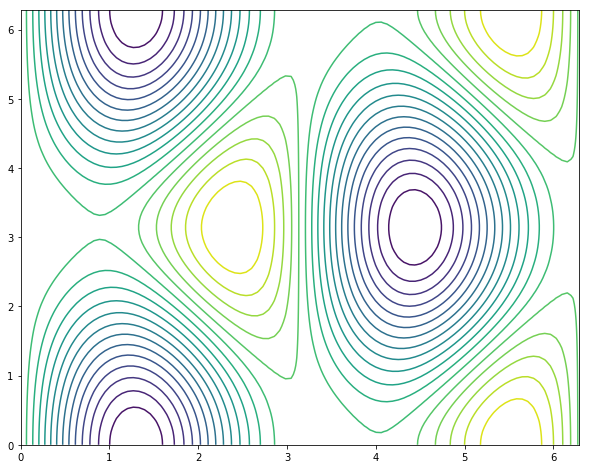

In [1191]:
contour_plot(X,Y,Zg[0,0])

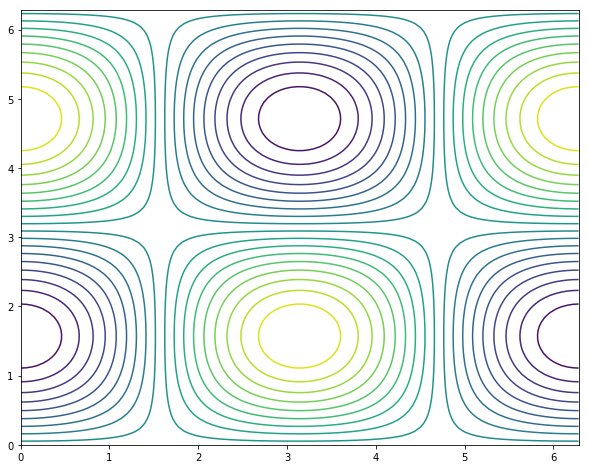

In [1192]:
contour_plot(X,Y,Zg[1,0])

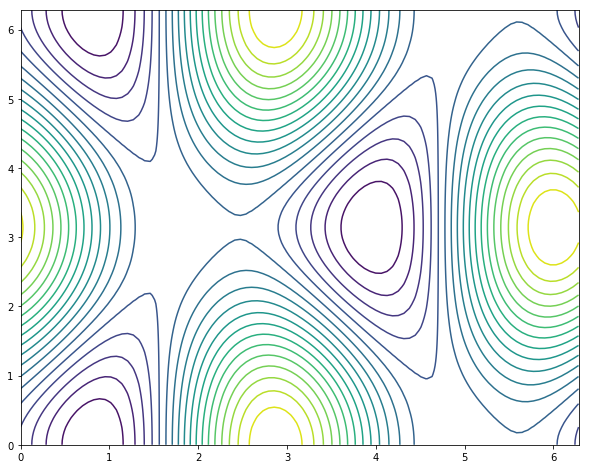

In [1193]:
contour_plot(X,Y,Zh[0,0])

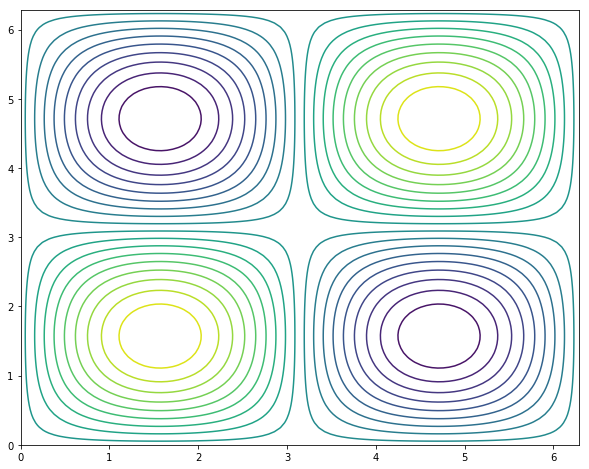

In [1194]:
contour_plot(X,Y,Zh[0,1])

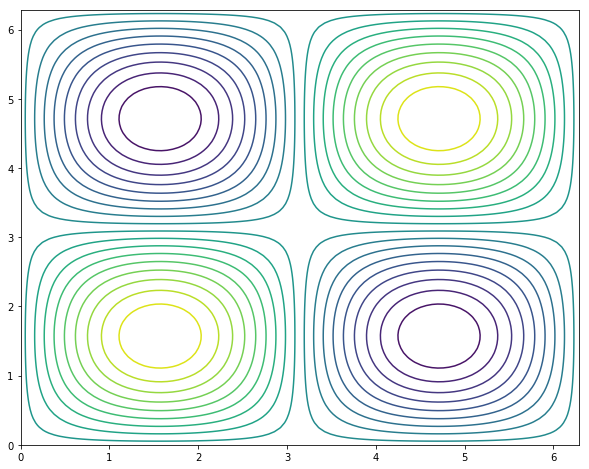

In [1195]:
contour_plot(X,Y,Zh[1,0])

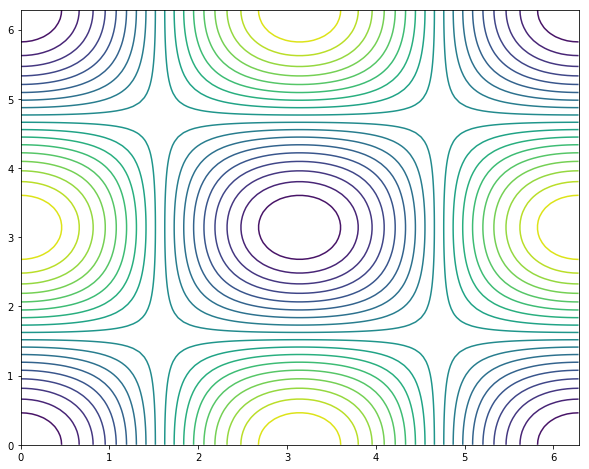

In [1196]:
contour_plot(X,Y,Zh[1,1])

In [1197]:
def show_newton2d(fun,grad,x0,step=1,bound=2*np.pi,tol=1e-8,maxiter=15):
    '''Illustration for the Newton method with contour plots'''
    # Newton steps
    xs=[np.reshape(np.array(x0),(2,1)),] + [None,]*maxiter
    for i in range(maxiter):
        x=xs[i]
        F = np.squeeze(fun(x[0],x[1]),axis=-1)
        G = np.squeeze(grad(x[0],x[1]),axis=-1)
        xs[i+1] = x - step*np.linalg.inv(G) @ F
        print('%3d (%12.8f,%12.8f) %1.3e' % (i,x[0],x[1],max(np.abs(xs[i+1]-xs[i]))))
        if max(np.abs(xs[i+1]-xs[i]))<tol:
            print('Converged on iteration %d' % i)
            break
    else:
        print('Did not converge in %d iterations!' % maxiter)
    return xs[:i+1]

  0 (  2.50000000,  4.80000000) 1.409e+00
  1 (  1.09076365,  4.19966463) 4.172e-01
  2 (  1.50794579,  3.84664021) 4.139e-01
  3 (  1.60148874,  4.26052670) 7.574e-02
  4 (  1.56965803,  4.33626870) 4.371e-02
  5 (  1.57077668,  4.29256151) 1.087e-03
  6 (  1.57079634,  4.29364844) 2.599e-05
  7 (  1.57079633,  4.29367443) 1.288e-08
  8 (  1.57079633,  4.29367442) 1.474e-13
Converged on iteration 8
Function at x*:  [2.69229083e-13 1.11885242e-16]


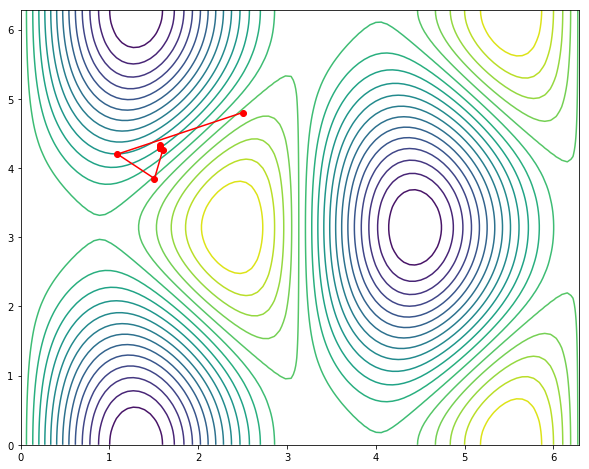

In [1198]:
x0 = np.array([2.5,4.8])
# x0 = np.array([3,3])
xs = show_newton2d(G,H,x0)
print('Function at x*: ' , np.squeeze(G(xs[-1][0],xs[-1][1])))
# make contour plot of fun
contour_plot(X,Y,Zg[0,0])
plt.plot([x[0] for x in xs],[x[1] for x in xs],color='red',marker='o')
plt.show()

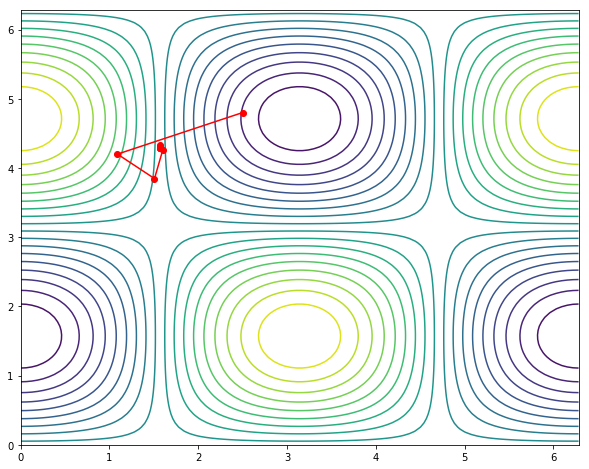

In [1199]:
contour_plot(X,Y,Zg[1,0])
plt.plot([x[0] for x in xs],[x[1] for x in xs],color='red',marker='o')
plt.show()

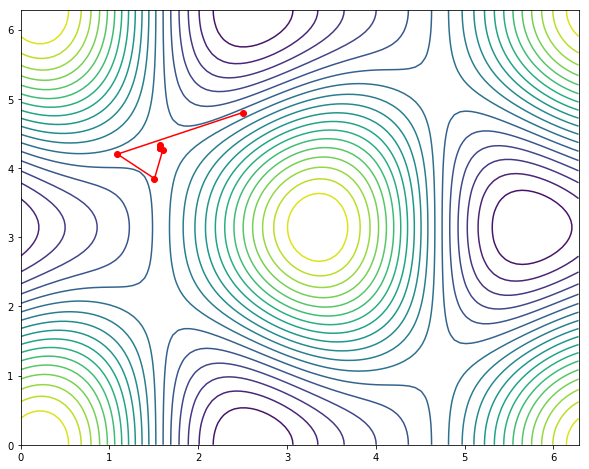

In [1200]:
# Back to optimization
contour_plot(X,Y,Zf)
plt.plot([x[0] for x in xs],[x[1] for x in xs],color='red',marker='o')
plt.show()

### Global convergence vs. global optima

In Newton step $x_{i+1} = x_i + s_i$ the second component 
$s_i = - \frac{f'(x_i)}{f''(x_i)} = - \big( \nabla^2 f(x_i) \big)^{-1} \nabla f(x_i)$ 
is the _direction_, with the step size fixed to one.

With a subproblem of choosing step size $\tau$, such that $x_{i+1} = x_i + \tau s_i$, Newton method becomes globally convergent.

**Globally convergent, but to local optimum**

### Gradient descent

$$
x_{i+1} = x_i - \tau \nabla f(x_i)
$$

$\nabla f(x_i)$ is direction of the fastest change in the function value.  Greedy algorithm, can be much slower that Newton.

In [1201]:
import scipy.optimize
def show_descent(fun,grad,x0,bound=2*np.pi,tol=1e-8,maxiter=15):
    '''Illustration for the gradient descent method with contour plots'''
    xs=[np.reshape(np.array(x0),(2,1)),] + [None,]*maxiter
    for i in range(maxiter):
        x=xs[i]
        G = np.squeeze(grad(x[0],x[1]),axis=-1)
        def stepfun(st):
            st1 = x + st*G
            return -np.squeeze(fun(st1[0],st1[1]),axis=-1) # - for max
        st = scipy.optimize.brute(stepfun,(slice(0.05, 2, 0.05),),finish=None)
        xs[i+1] = x + st*G
        print('%3d (%12.8f,%12.8f) %1.3e' % (i,x[0],x[1],max(np.abs(xs[i+1]-xs[i]))))
        if max(np.abs(xs[i+1]-xs[i]))<tol:
            print('Converged on iteration %d' % i)
            break
    else:
        print('Did not converge in %d iterations!' % maxiter)
    return xs[:i+1]

  0 (  2.50000000,  4.80000000) 1.596e+00
  1 (  3.40570610,  3.20385817) 6.858e-02
  2 (  3.33712682,  3.16781762) 1.868e-02
  3 (  3.35580649,  3.14981203) 6.987e-03
  4 (  3.34881909,  3.14499318) 2.329e-03
  5 (  3.35070227,  3.14266374) 7.039e-04
  6 (  3.34999837,  3.14203509) 3.463e-04
  7 (  3.35021491,  3.14168880) 1.041e-04
  8 (  3.35011080,  3.14163236) 2.802e-05
  9 (  3.35013883,  3.14160517) 1.047e-05
 10 (  3.35012836,  3.14159782) 3.540e-06
 11 (  3.35013118,  3.14159428) 1.053e-06
 12 (  3.35013012,  3.14159333) 5.266e-07
 13 (  3.35013045,  3.14159280) 1.297e-07
 14 (  3.35013032,  3.14159273) 5.115e-08
Did not converge in 15 iterations!
Function at x*:  [ 1.32877255e-08 -1.46144830e-07]


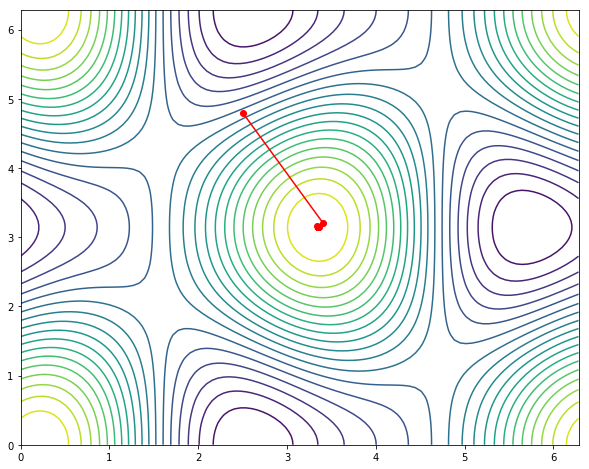

In [1202]:
x0 = np.array([2.5,4.8])
# x0 = np.array([5.6985,  3.2])
xs = show_descent(F,G,x0)
print('Function at x*: ' , np.squeeze(G(xs[-1][0],xs[-1][1])))
# make contour plot of fun
contour_plot(X,Y,Zf)
plt.plot([x[0] for x in xs],[x[1] for x in xs],color='red',marker='o')
plt.show()

## General classification of optimization methods

1. Line search methods
    - Quasi-Newton
    - Gradient descent
2. Trust region methods
3. Derivative free algorithms
    - Nedler-Mead (simplex)
    - Pattern search
4. Global algorithms
    - Simulation based
4. **Poly-algorithms** Combinations of other algorithms

## Quasi-Newton methods 

**SciPy.optimize**

Main idea: replace Jacobian/Hessian with approximation.  For example, when costly to compute, and/or unavailable in analytic form.

- DFP (Davidon–Fletcher–Powell)
- BFGS (Broyden–Fletcher–Goldfarb–Shanno)
- SR1 (Symmetric rank-one)
- BHHH (Berndt–Hall–Hall–Hausman)

## Derivative-free methods

**Methods of last resort!**

- Grid search (brute in SciPy)
- Nelder-Mead
- Pattern search
- Model specific (POUNDerS for min sum of squares)

### Nelder-Mead

1. Initialize a simplex
2. Update simplex based on function values
    - Increase size of the simplex
    - Reduce size of the simplex
    - Reflection of the simplex
3. Iterate until convergence

Convergent methods can be constructed

<img src="img/nedlermead.png" width=800px/>

### Trade-off with derivative free methods

Only local convergence. Anybody talking about global convergence with derivative free methods is 

- either assumes something about the problem (for example, concavity),
- or expects you to wait forever

"An algorithm converges to the global minimum for any continuous $f$ if and only if the sequence of points
visited by the algorithm is dense in $\Omega$." Torn & Zilinskas




## Global and simulation-based methods

Coincide with derivative-free methods $\Rightarrow$ see above!

- Simulated annealing (basinhopping is SciPy.optimize)
- Particle swarms
- Evolutionary algorithms

Better idea: Multi-start + poly-algorithms

## Constrained optimization

Also represented in SciPy.Optimize

- Constrained optimization by linear approximation (COBYLA)
- Sequential Least SQuares Programming (SLSQP)
- Trust region with constraints

## Further learning resources
* Docs https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize